In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import gc
from tqdm import tqdm
import matplotlib.pyplot as plt

In [36]:
DATASETS = ['A','B','C','D','E','F']
#DATASETS = ['C']
datalist = []

for dataset in DATASETS:
    files = [i[:-4] for i in os.listdir(f'../data/{dataset}/formatted/') if i.find('.npy')!=-1]
    for file in files:
        datalist.append(f'../data/{dataset}/formatted/'+file)



# Check the length fits json and numpy

In [8]:
for data in tqdm(datalist):
    signal = np.load(data+'.npy')
    meta = json.load(open(data+'.json'))
    
    if meta['shape'][0] != signal.shape[0]:
        break
    

100%|██████████| 43101/43101 [05:08<00:00, 139.67it/s] 


# Check the length distribution, all datasets

100%|██████████| 43101/43101 [04:12<00:00, 170.38it/s] 


<AxesSubplot:>

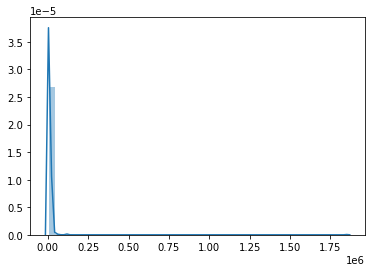

In [41]:
length_list = []
exclusions = []
exclusions_labels = []
exclusions_digits = []

for data in tqdm(datalist):
    meta = json.load(open(data+'.json'))
    if meta['labels_training_merged'] is None:
        continue
    if meta['shape'][0] > 38000:
        file_name = data.split('/')     
        exclusions.append(file_name[-1])
        exclusions_labels.append(meta['labels_full'])
        exclusions_digits.append()
    length_list.append(meta['shape'][0])

    
sns.distplot(length_list)

In [43]:
exclusions

['A6181',
 'A5177',
 'A4739',
 'A6480',
 'A1670',
 'A2404',
 'A6831',
 'A0017',
 'A0750',
 'A2922',
 'A0815',
 'A0166',
 'A5285',
 'A1395',
 'A2256',
 'A6716',
 'A3546',
 'A5601',
 'A2289',
 'A2732',
 'A2482',
 'A4982',
 'A2425',
 'A6696',
 'A4756',
 'A0631',
 'A4738',
 'A4263',
 'A6216',
 'A6832',
 'A3536',
 'A3872',
 'A4218',
 'A5356',
 'A6633',
 'A0769',
 'A5618',
 'A2006',
 'A6815',
 'A3871',
 'A1579',
 'A2396',
 'A0113',
 'A6558',
 'A1332',
 'A0713',
 'A3183',
 'A4499',
 'A0080',
 'A4404',
 'A1988',
 'A4216',
 'A4318',
 'A1237',
 'A3069',
 'A6875',
 'A4552',
 'A0290',
 'A5911',
 'A1340',
 'A0649',
 'A3605',
 'A5878',
 'A4549',
 'A3087',
 'A5189',
 'A5037',
 'A2221',
 'A3985',
 'A5841',
 'A0551',
 'A0661',
 'A0145',
 'A2593',
 'A4004',
 'A6505',
 'A4652',
 'A5042',
 'A1374',
 'A6850',
 'A0441',
 'A4972',
 'A1073',
 'A4698',
 'A5488',
 'A4342',
 'A2935',
 'A2020',
 'A3170',
 'A0445',
 'A1462',
 'A3943',
 'A4315',
 'A0582',
 'A0069',
 'A2681',
 'A3025',
 'A3842',
 'A0529',
 'A3614',


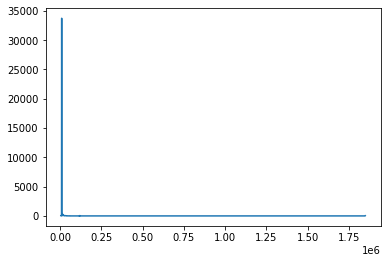

In [21]:
hist = np.histogram(length_list,2000)
plt.plot(hist[1][:-1][:100],hist[0])

In [31]:
np.percentile(length_list,99)

38000.0

In [32]:
len(length_list)

37749